Lifelong data from paper: https://www.nature.com/articles/s41467-021-27594-w#data-availability

In [8]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath("../../src/utils"))
from preprocess import * 
from plotting import *


In [9]:
atac_cells_to_psd = merge_cluster_metadata('atac', 'peak_region_fragments')
atac_cells_to_psd.rename(columns={'cell': 'atac_cell'}, inplace=True)
atac_cells_to_psd

,atac_cell,peak_region_fragments,stage_dpf,annotation,pseudobulk
0,AAACGAAAGGATATCA-1,3714,1.5,cycling cells,1.5_cycling cells
1,AAACGAAAGTTCCCGG-1,8365,1.5,cycling cells,1.5_cycling cells
2,AAACGAAAGTTTACGC-1,4322,1.5,cycling cells,1.5_cycling cells
3,AAACGAACAATGACTC-1,9818,1.5,cycling cells,1.5_cycling cells
4,AAACGAATCGGTTAGT-1,7185,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
36736,TTTGTGTGTGTTAGAA-1,4113,210.0,gill progenitor 1,210_gill progenitor 1
36737,TTTGTGTTCAATCGTG-1,2713,210.0,stroma 1,210_stroma 1
36738,TTTGTGTTCTCATATC-1,3648,210.0,perivascular,210_perivascular
36739,TTTGTGTTCTTCTCTC-1,6777,210.0,teeth,210_teeth


/sasselab3/home/mourouzidou/zebrafish_development/src/utils/plotting.py:617: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


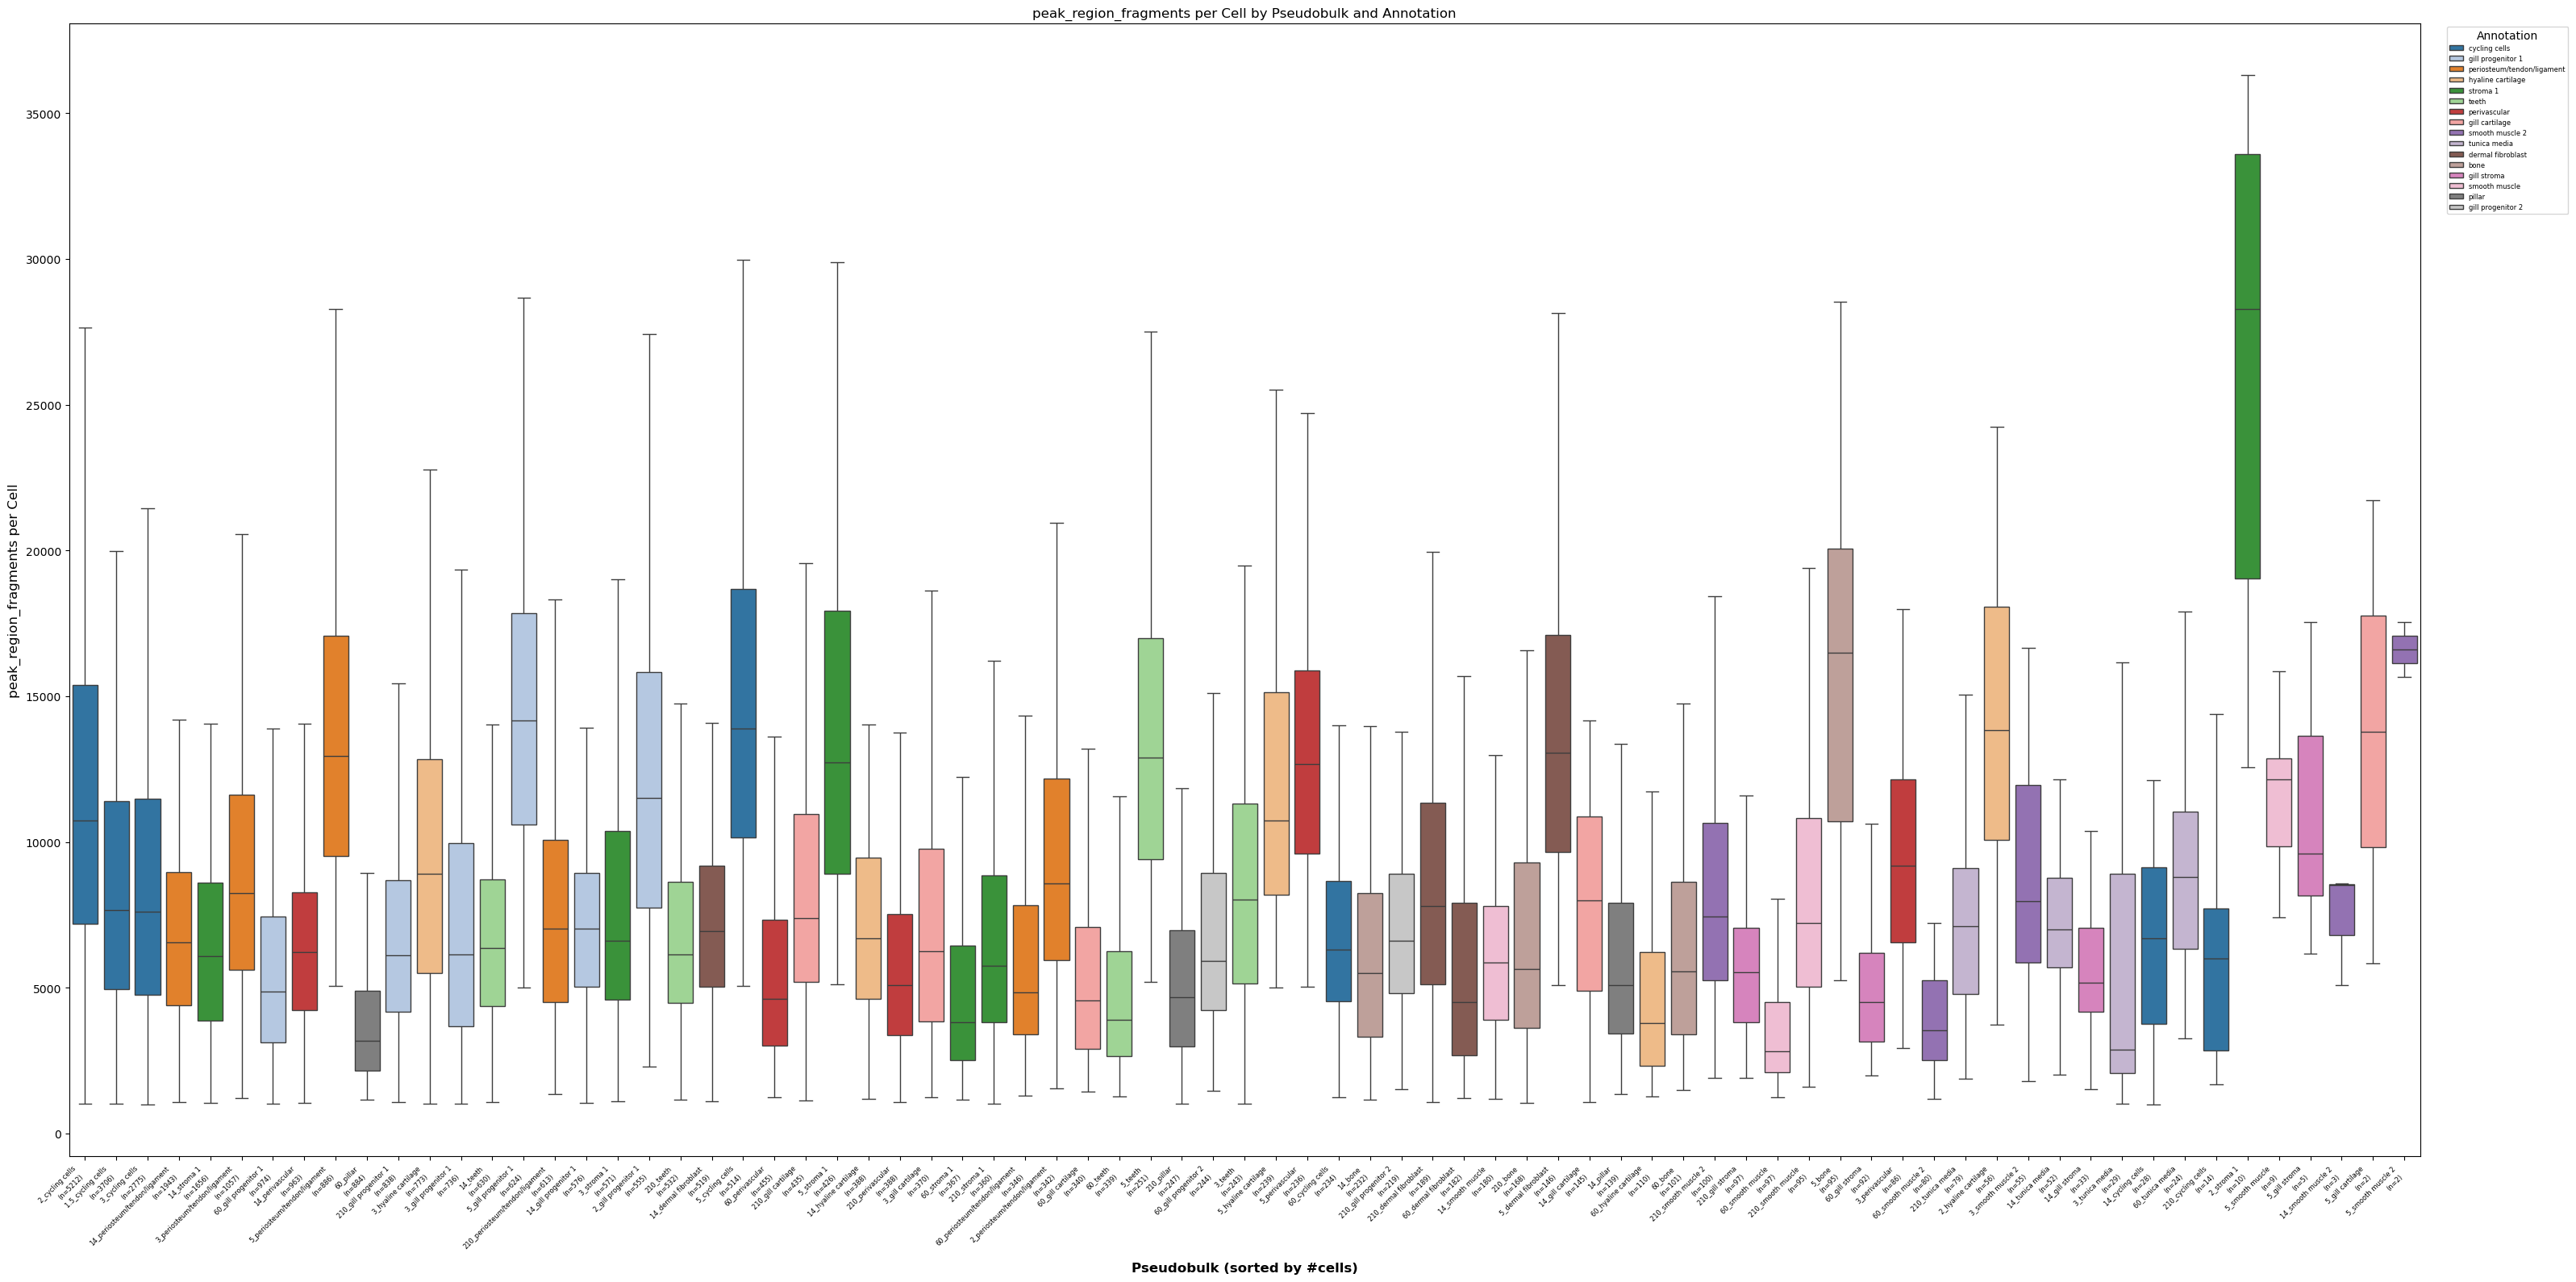

In [10]:
plot_pseudobulk_distributions(atac_cells_to_psd, count_col = 'peak_region_fragments', max_pseudobulks = None)

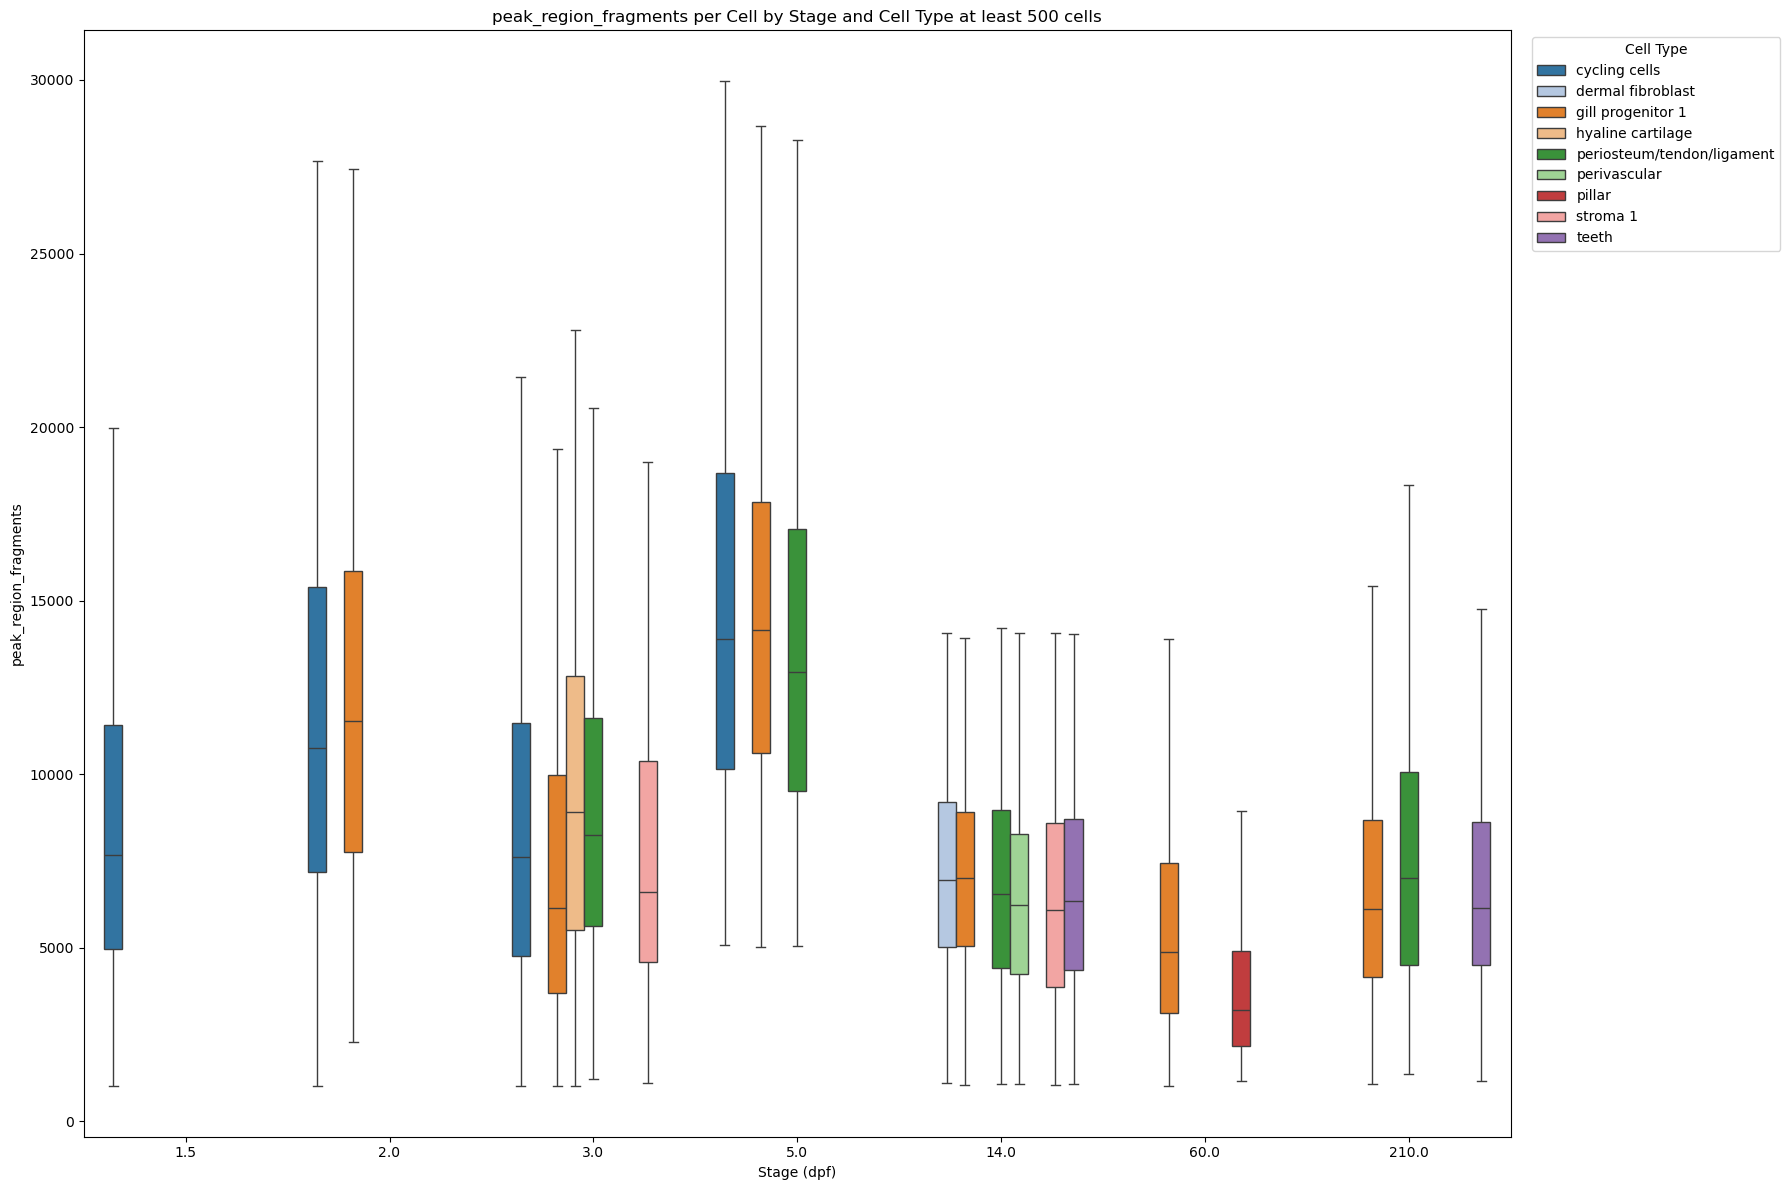

In [61]:
plot_reads_per_cell_by_celltype_and_stage(atac_cells_to_psd, count_col='peak_region_fragments', min_cells_per_group=500, group_by='stage')

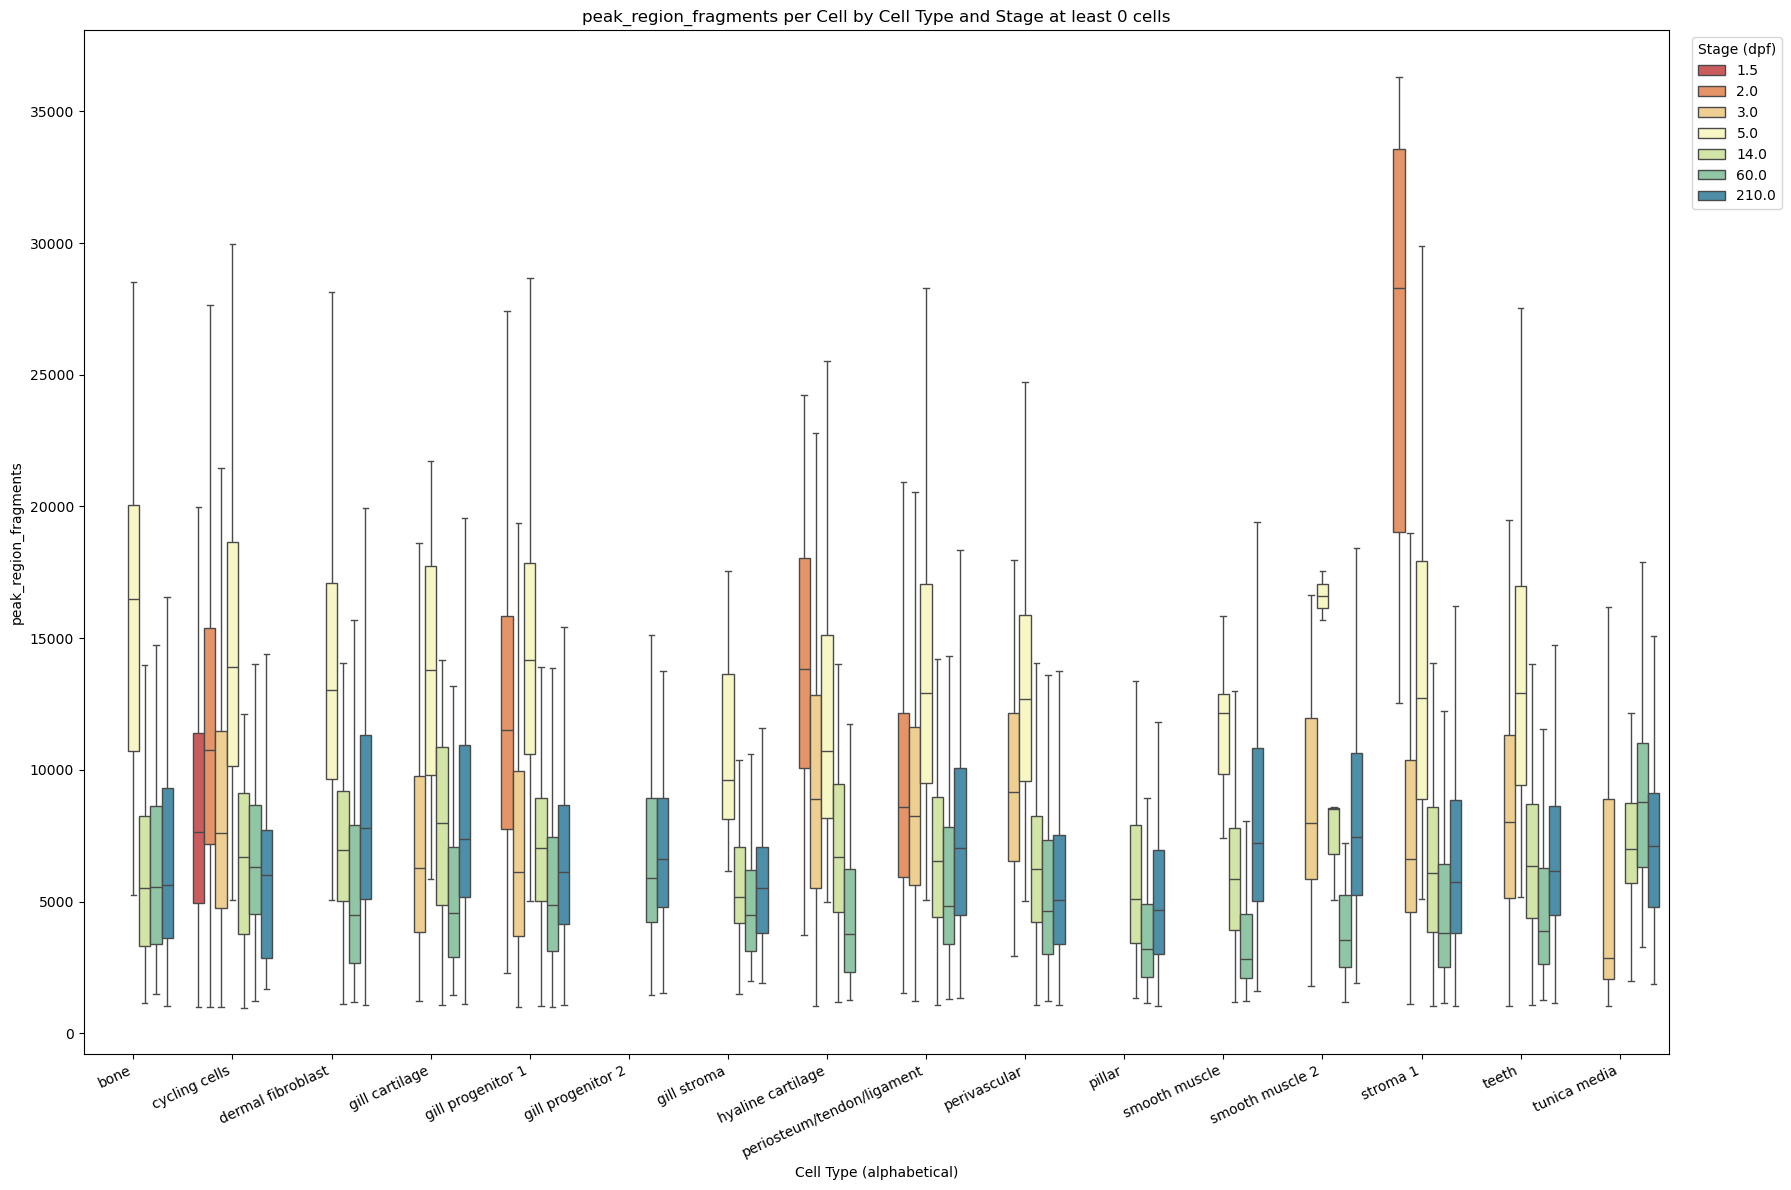

In [40]:
plot_reads_per_cell_by_celltype_and_stage(atac_cells_to_psd, count_col='peak_region_fragments', min_cells_per_group=0)

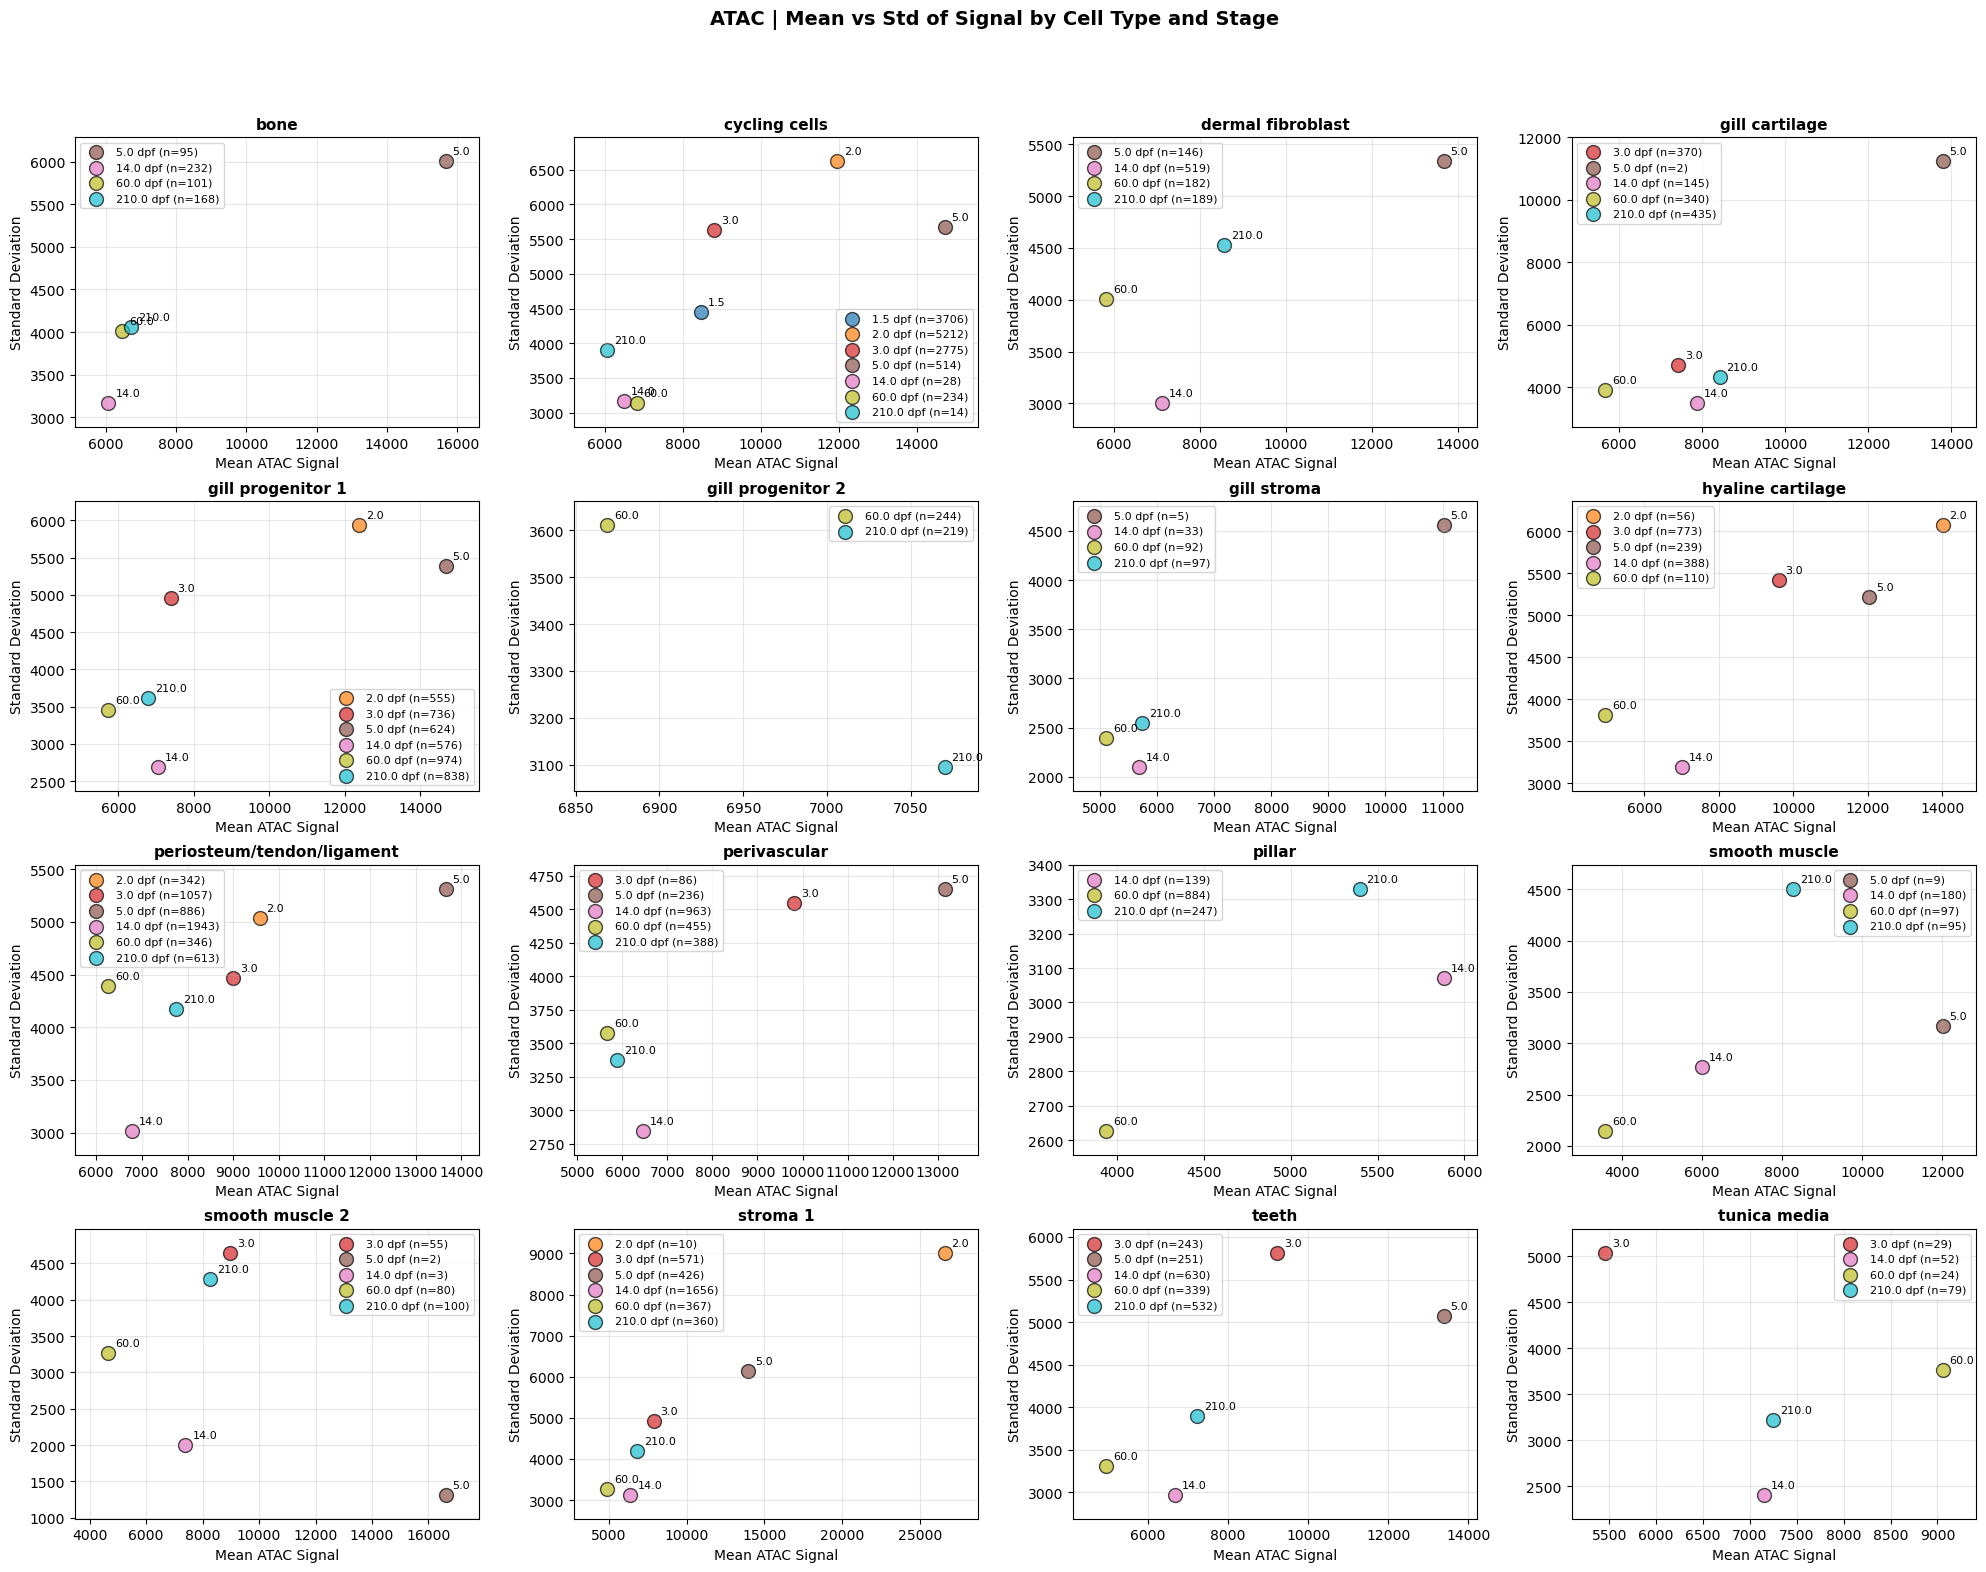

In [41]:
plot_mean_vs_std_by_celltype_and_stage(
    df=atac_cells_to_psd, 
    signal_col='peak_region_fragments', 
    modality_label='ATAC'
)


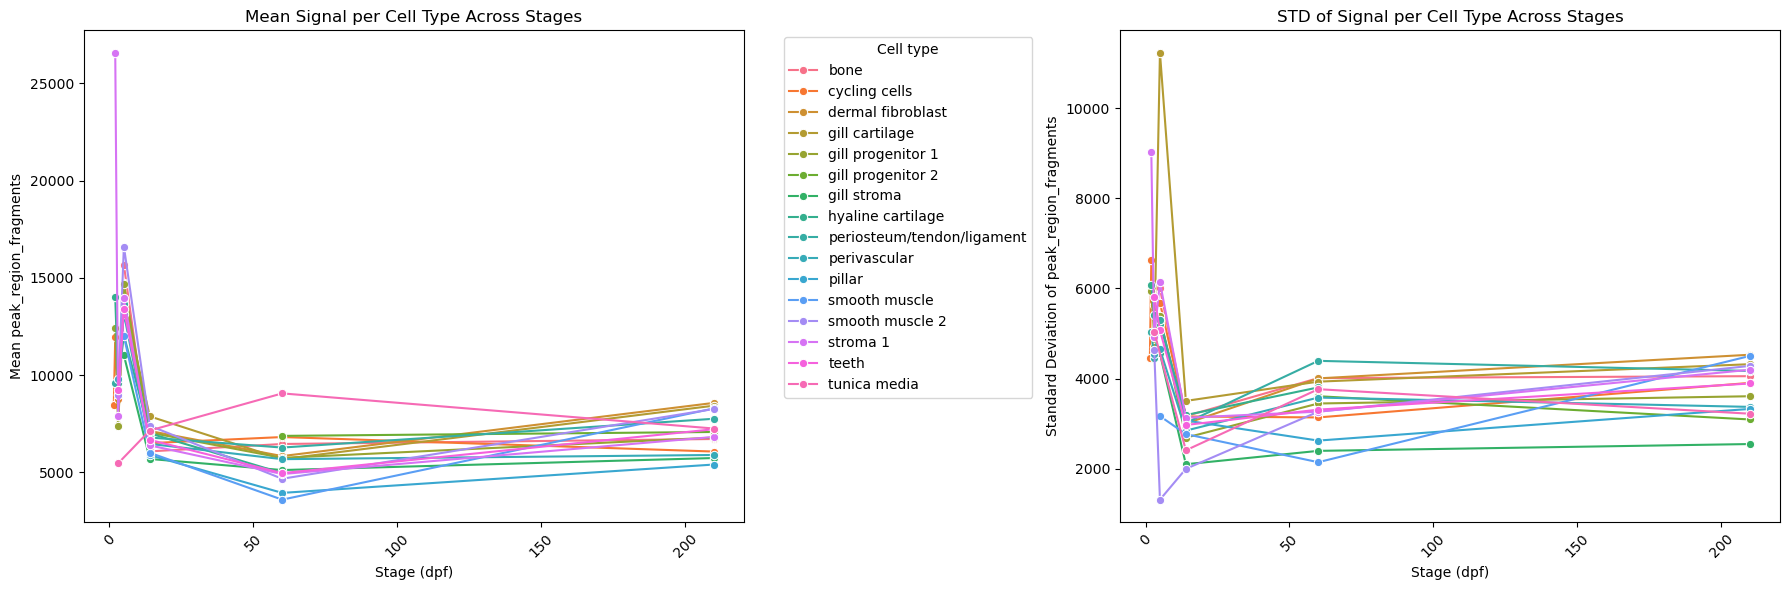

In [42]:

lineplot_mean_std_by_stage(atac_cells_to_psd)



_____________________________
### RNA

In [43]:
rna_cells_to_psd = merge_cluster_metadata('rna', 'nCount_RNA')
rna_cells_to_psd


,cell,nCount_RNA,stage_dpf,annotation,pseudobulk
0,Sox10BtR_36hpf-1_020618_AAACCTGGTTCACCTC-1,6103,1.5,cycling cells,1.5_cycling cells
1,Sox10BtR_36hpf-1_020618_AAACGGGGTAACGTTC-1,6839,1.5,cycling cells,1.5_cycling cells
2,Sox10BtR_36hpf-1_020618_AAACGGGGTACTCAAC-1,7758,1.5,cycling cells,1.5_cycling cells
3,Sox10BtR_36hpf-1_020618_AAACGGGGTATAGGGC-1,8253,1.5,cycling cells,1.5_cycling cells
4,Sox10BtR_36hpf-1_020618_AAACGGGGTCAAAGAT-1,1658,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
46156,3_TTTGTCACAATAACGA-1,6016,150.0,gill cartilage,150_gill cartilage
46157,3_TTTGTCAGTCTCCACT-1,2241,150.0,periosteum/tendon/ligament,150_periosteum/tendon/ligament
46158,3_TTTGTCATCAAAGACA-1,6582,150.0,gill cartilage,150_gill cartilage
46159,3_TTTGTCATCAACACCA-1,1300,150.0,teeth,150_teeth


In [44]:
#print rna unique annotations
r = rna_cells_to_psd['annotation'].unique()
a = atac_cells_to_psd['annotation'].unique()
print("RNA unique annotations not in ATAC:", set(r) - set(a))


RNA unique annotations not in ATAC: {'stroma 2'}


/sasselab3/home/mourouzidou/zebrafish_development/src/utils/plotting.py:617: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


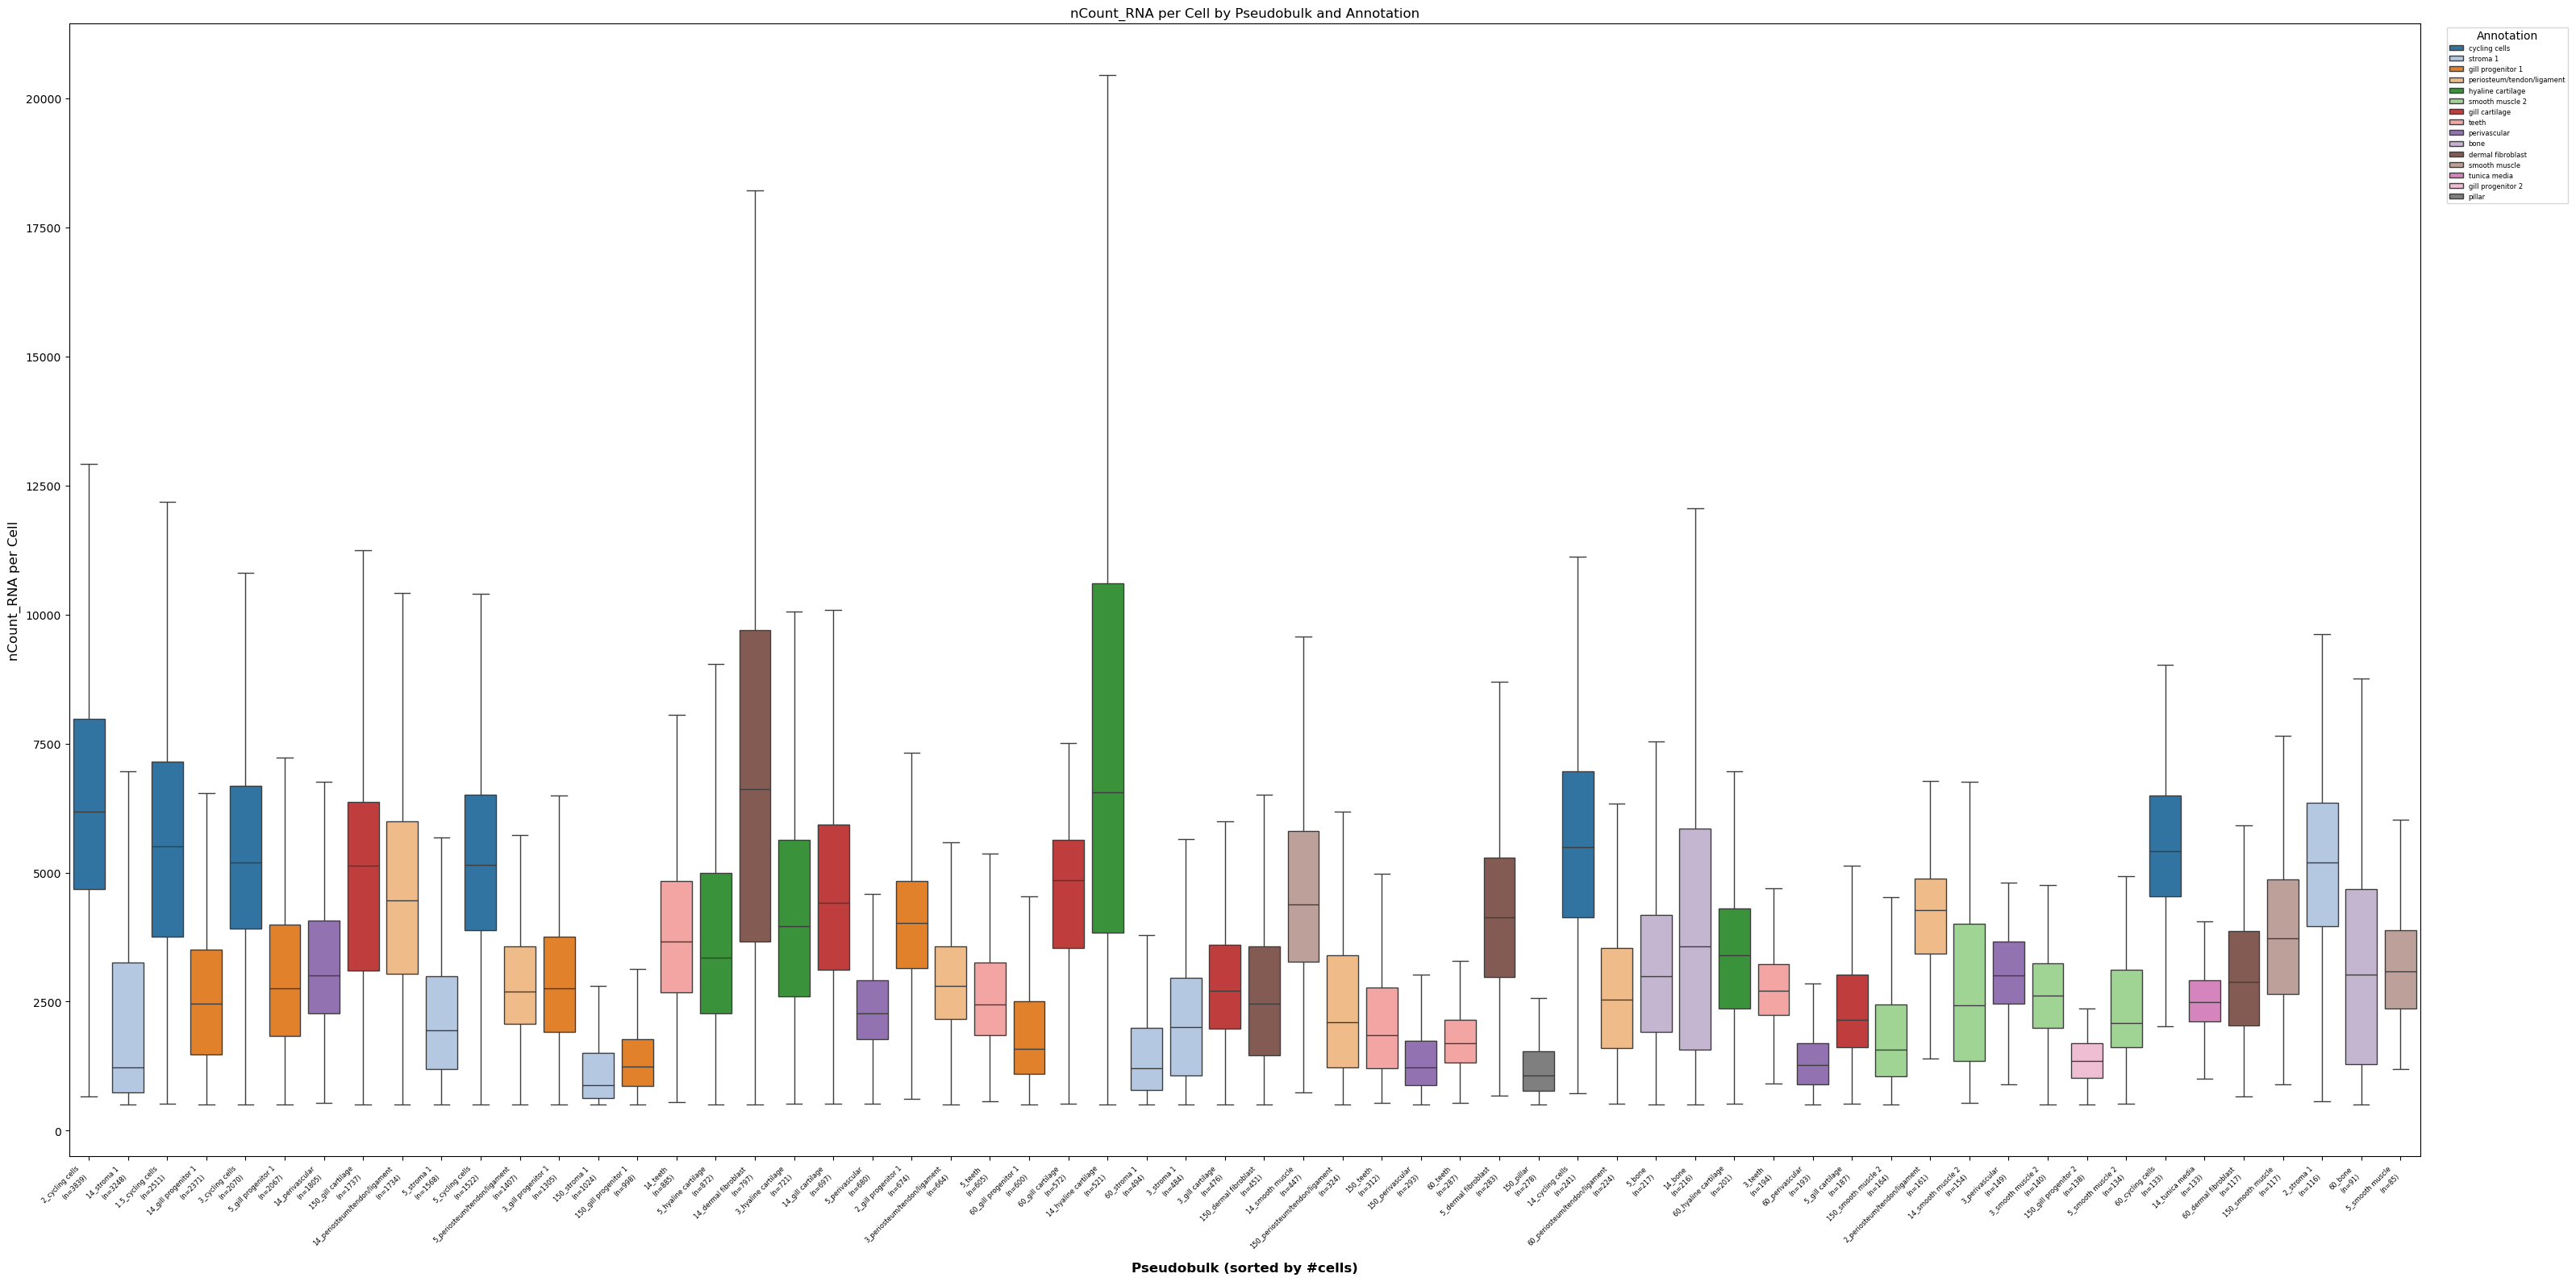

In [45]:
plot_pseudobulk_distributions(rna_cells_to_psd, count_col = 'nCount_RNA', max_pseudobulks=60)

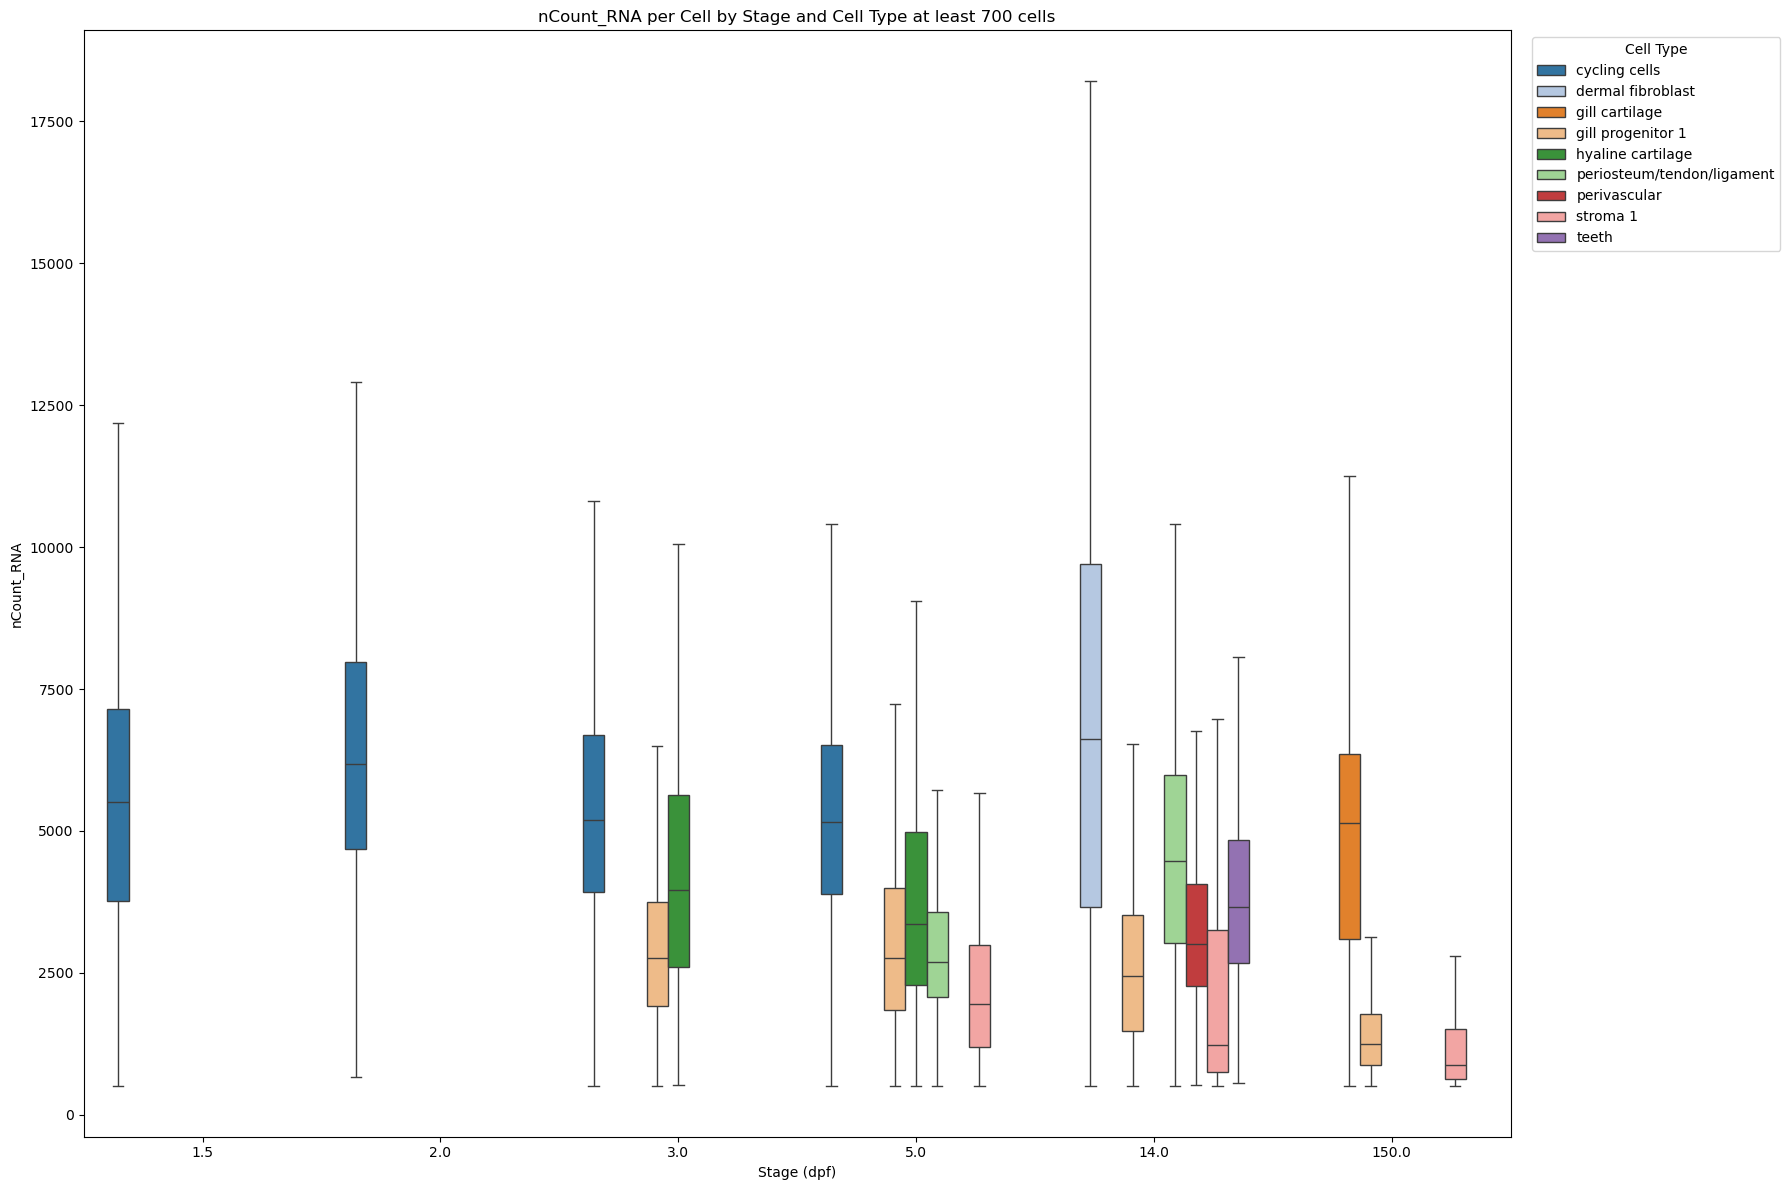

In [60]:
plot_reads_per_cell_by_celltype_and_stage(rna_cells_to_psd, count_col='nCount_RNA', min_cells_per_group=700, group_by='stage')

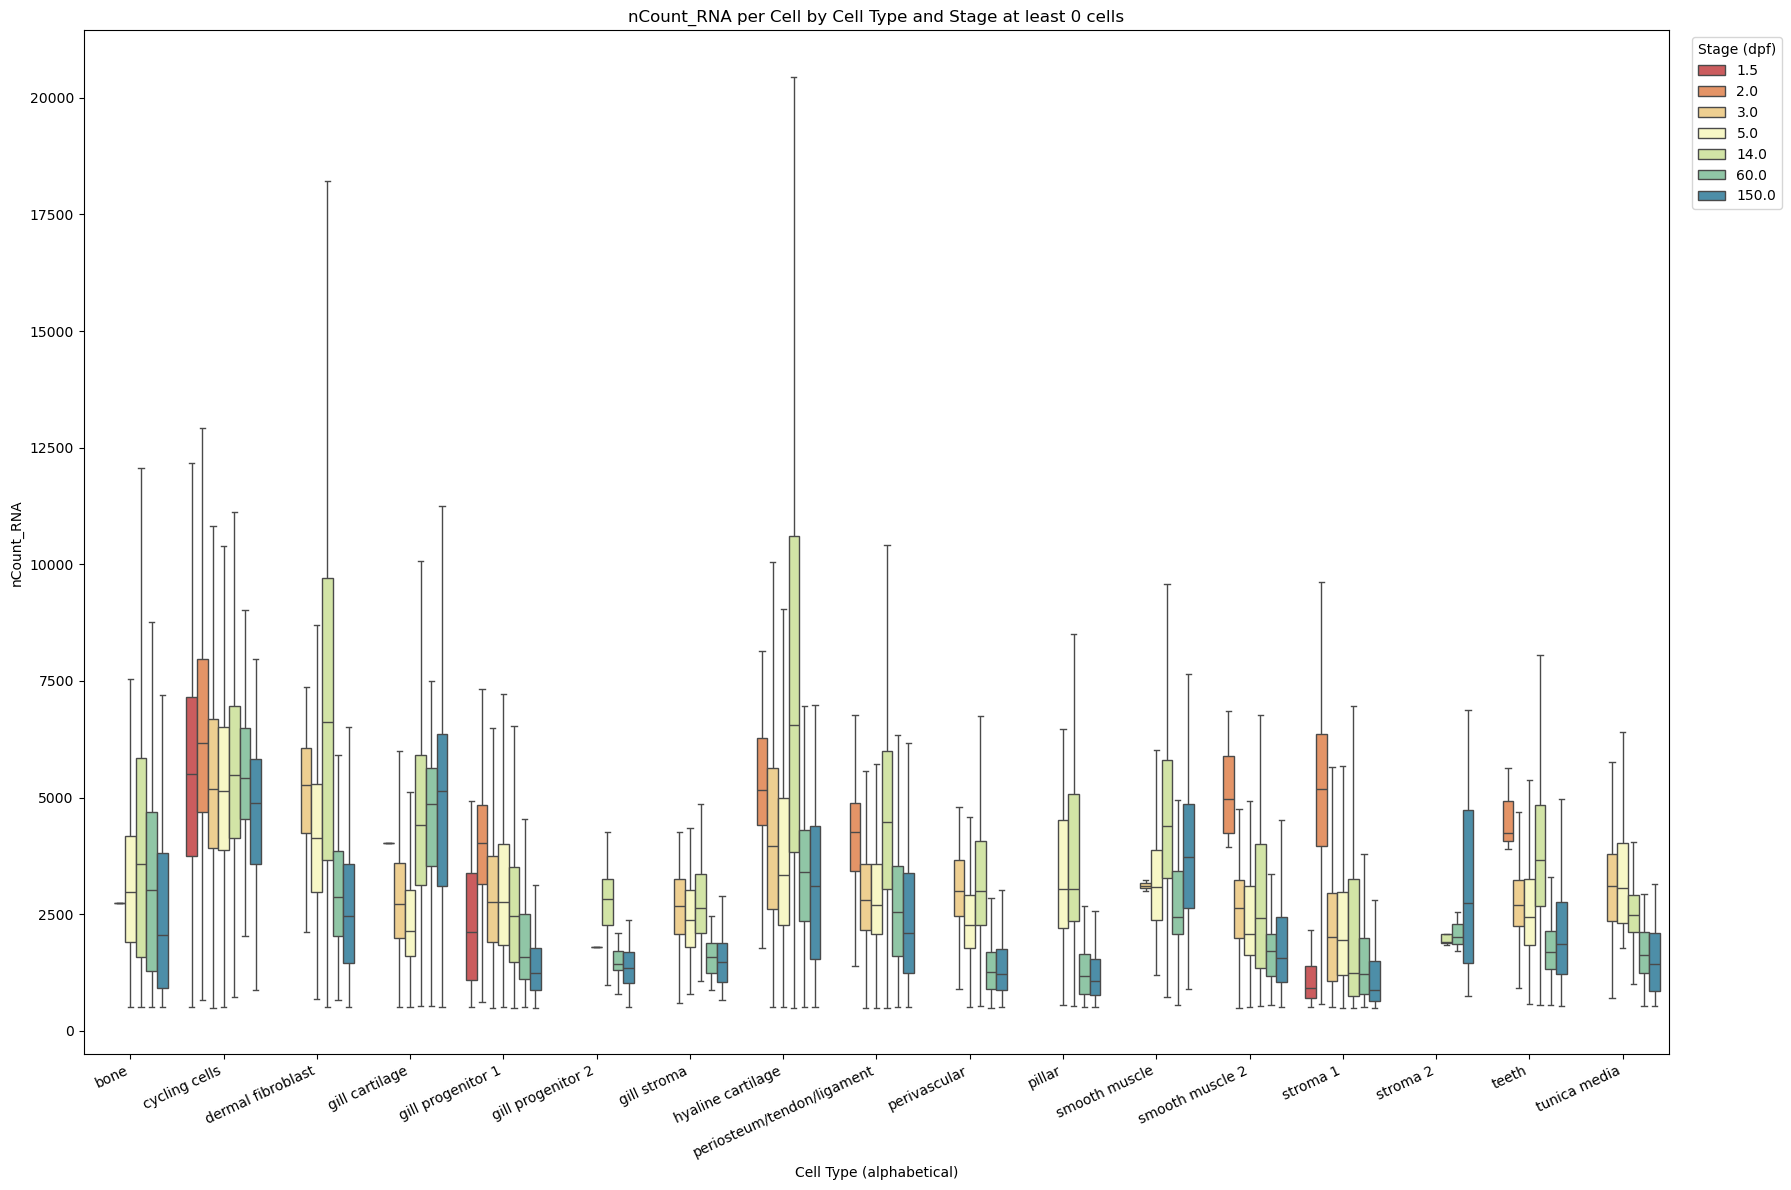

In [47]:
plot_reads_per_cell_by_celltype_and_stage(rna_cells_to_psd, count_col='nCount_RNA', min_cells_per_group=0)

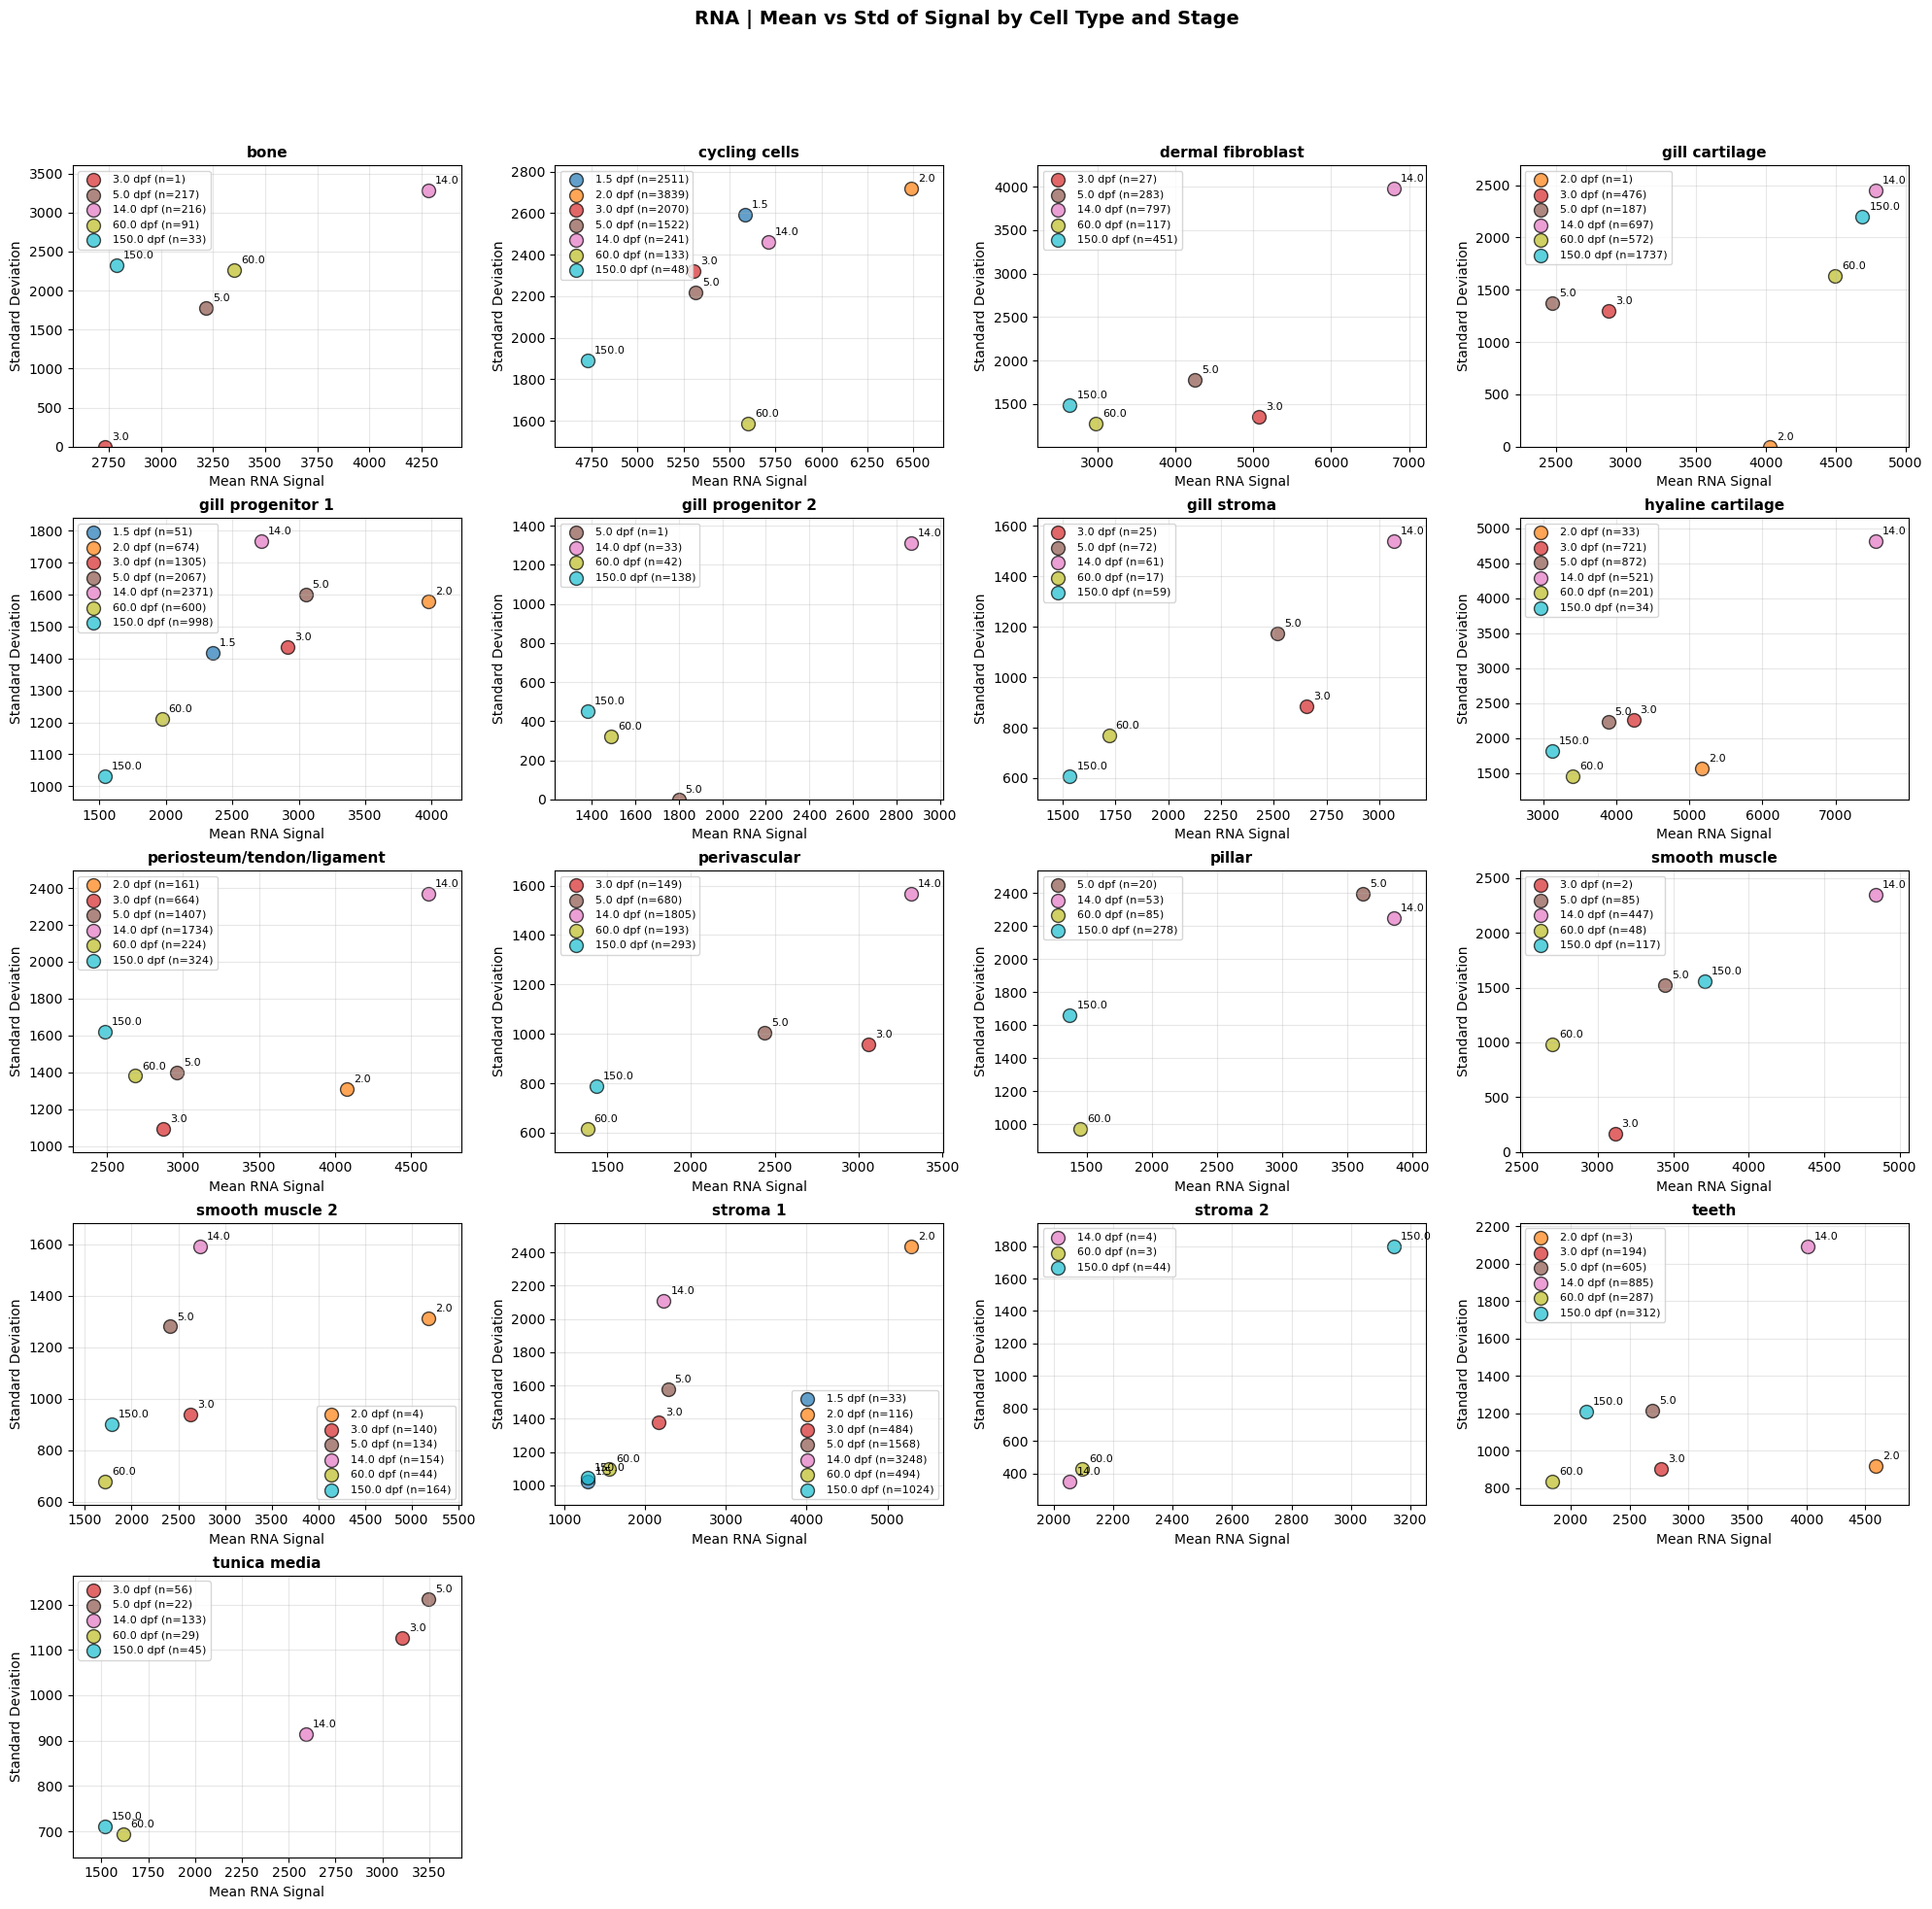

In [48]:
plot_mean_vs_std_by_celltype_and_stage(
    df=rna_cells_to_psd, 
    signal_col='nCount_RNA', 
    modality_label='RNA'
)


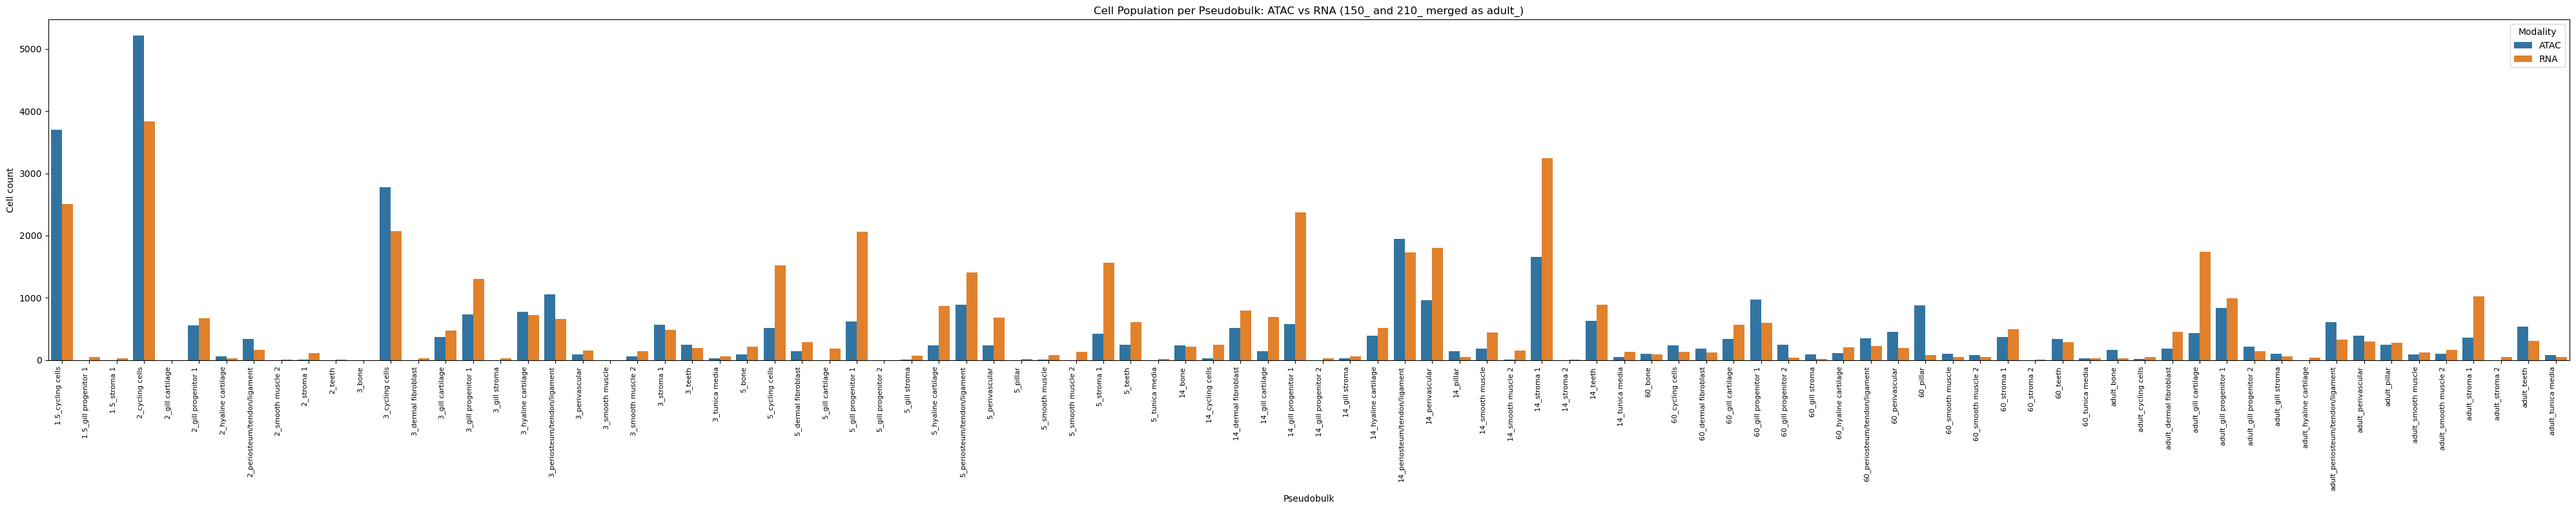

In [49]:
plot_pseudobulk_cell_counts(atac_cells_to_psd, rna_cells_to_psd)

In [50]:
# rename 150 dpf in stage_dpf of rna_cells_to_psd to 210 
rna_cells_to_psd_210 = rna_cells_to_psd.copy()
rna_cells_to_psd_210['stage_dpf'] = rna_cells_to_psd['stage_dpf'].replace({150: 210})

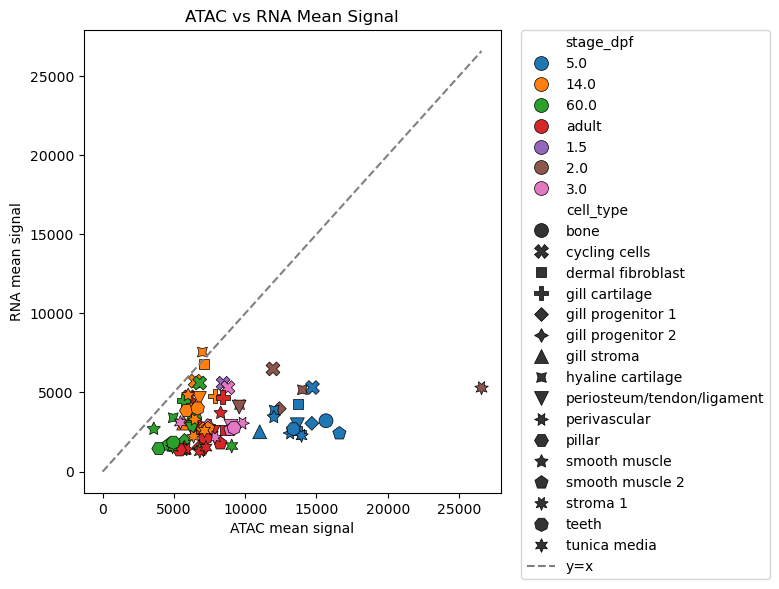

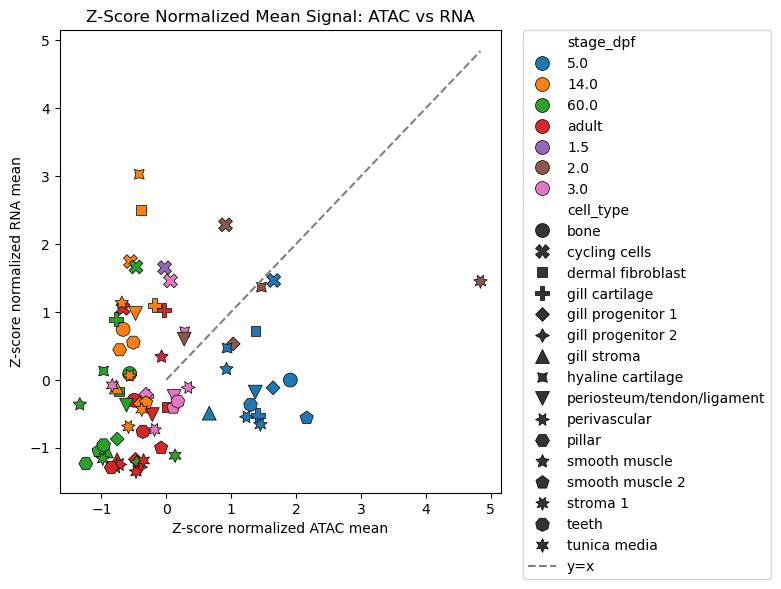

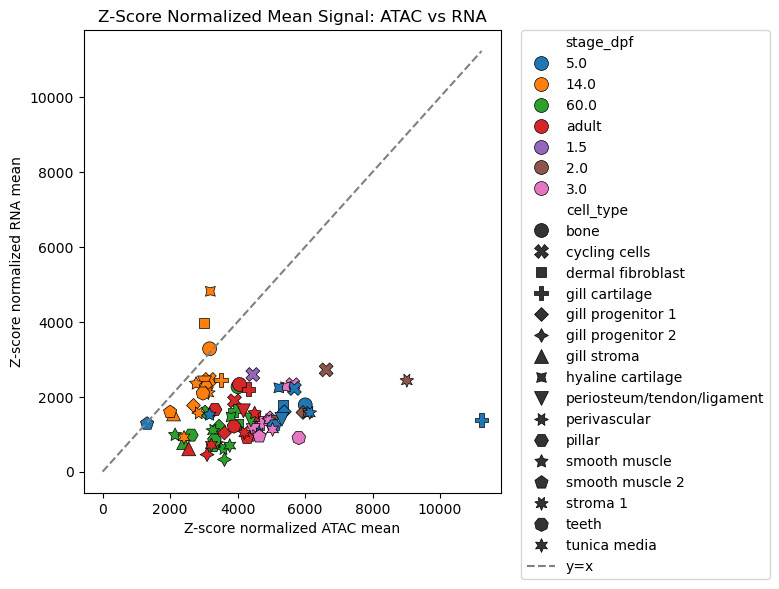

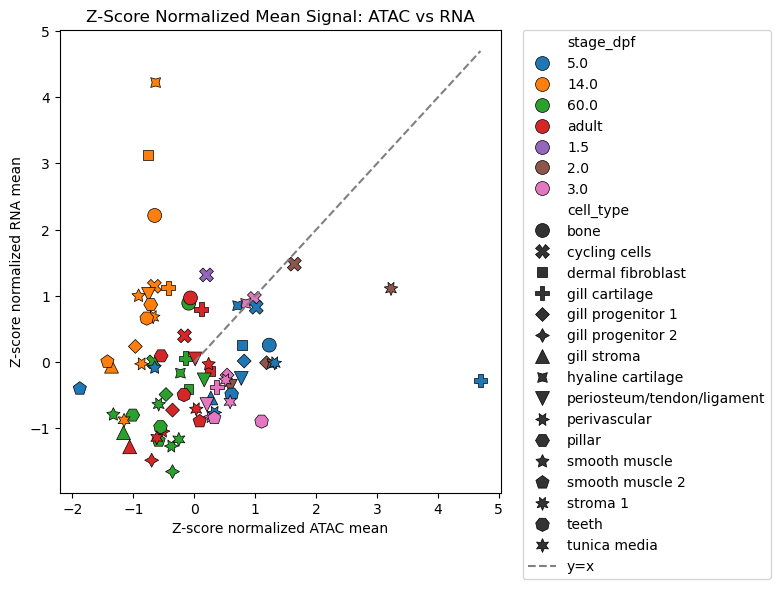

In [51]:
from scipy.stats import zscore
atac_mean_df = atac_cells_to_psd.groupby(['annotation', 'stage_dpf'])['peak_region_fragments'].mean().reset_index()
rna_mean_df = rna_cells_to_psd_210.groupby(['annotation', 'stage_dpf'])['nCount_RNA'].mean().reset_index()

atac_mean_df.columns = ['cell_type', 'stage_dpf', 'mean_atac']
rna_mean_df.columns = ['cell_type', 'stage_dpf', 'mean_rna']

merged_mean_df = pd.merge(atac_mean_df, rna_mean_df, on=['cell_type', 'stage_dpf'], how='inner')


atac_std_df = atac_cells_to_psd.groupby(['annotation', 'stage_dpf'])['peak_region_fragments'].std().reset_index()
rna_std_df = rna_cells_to_psd_210.groupby(['annotation', 'stage_dpf'])['nCount_RNA'].std().reset_index()
atac_std_df.columns = ['cell_type', 'stage_dpf', 'std_atac']
rna_std_df.columns = ['cell_type', 'stage_dpf', 'std_rna']

merged_std_df = pd.merge(atac_std_df, rna_std_df, on=['cell_type', 'stage_dpf'], how='inner')
# Z-score normalize the means and the stds
merged_mean_df['z_mean_atac'] = zscore(merged_mean_df['mean_atac'])
merged_mean_df['z_mean_rna'] = zscore(merged_mean_df['mean_rna'])

merged_std_df['z_std_atac'] = zscore(merged_std_df['std_atac'])
merged_std_df['z_std_rna'] = zscore(merged_std_df['std_rna'])



plot_mean_vs_mean(
    df=merged_mean_df,
    x_col='mean_atac',
    y_col='mean_rna',
    x_label='ATAC mean signal',
    y_label='RNA mean signal',
    title='ATAC vs RNA Mean Signal',
    hue='stage_dpf',
    style='cell_type',
    figsize=(8, 6)
)
plot_mean_vs_mean(
    merged_mean_df,
    x_col='z_mean_atac',
    y_col='z_mean_rna',
    x_label='Z-score normalized ATAC mean',
    y_label='Z-score normalized RNA mean',
    title='Z-Score Normalized Mean Signal: ATAC vs RNA'
)

plot_mean_vs_mean(
    merged_std_df,
    x_col='std_atac',
    y_col='std_rna',
    x_label='Z-score normalized ATAC mean',
    y_label='Z-score normalized RNA mean',
    title='Z-Score Normalized Mean Signal: ATAC vs RNA'
)

plot_mean_vs_mean(
    merged_std_df,
    x_col='z_std_atac',
    y_col='z_std_rna',
    x_label='Z-score normalized ATAC mean',
    y_label='Z-score normalized RNA mean',
    title='Z-Score Normalized Mean Signal: ATAC vs RNA'
)

### Load ATAC and RNA data for all time points


In [ ]:
import polars as pl
from collections import Counter

# List of ATAC file paths
atac_files = [
    '../../data/lifelong/raw/dpf1.5_atac_counts.csv',
    '../../data/lifelong/raw/dpf2_atac_counts.csv',
    '../../data/lifelong/raw/dpf3_atac_counts.csv',
    '../../data/lifelong/raw/dpf5_atac_counts.csv',
    '../../data/lifelong/raw/dpf14_atac_counts.csv',
    '../../data/lifelong/raw/dpf60_atac_counts.csv',
    '../../data/lifelong/raw/dpf210_atac_counts.csv'
]

all_cell_names = []
atac_dfs = []

# First, collect all cell column names (excluding first column)
for f in atac_files:
    df = pl.read_csv(f, low_memory=True, n_rows=1)  # Just load header
    all_cell_names.extend(df.columns[1:])

# Count occurrences to detect duplicates
cell_name_counts = Counter(all_cell_names)

# Load and rename duplicates
for f in atac_files:
    df = pl.read_csv(f, low_memory=True)
    cols = df.columns
    new_cols = [cols[0]]  # keep first (peak name) unchanged

    for col in cols[1:]:
        if cell_name_counts[col] > 1:
            # Rename only the duplicates by appending filename or suffix
            new_cols.append(f"{col}__{f.split('/')[-1].split('_')[0]}")
        else:
            new_cols.append(col)

    df.columns = new_cols
    atac_dfs.append(df)

# Merge: take peak column from first df
peak_column = atac_dfs[0].select(atac_dfs[0].columns[0])
value_columns = [df.select(df.columns[1:]) for df in atac_dfs]

atac_counts_data = pl.concat([peak_column] + value_columns, how="horizontal")
print(atac_counts_data.shape)


(445300, 36742)


In [5]:
atac_counts_data

,AAACGAAAGGATATCA-1,AAACGAAAGTTCCCGG-1,AAACGAAAGTTTACGC-1,AAACGAACAATGACTC-1,AAACGAATCGGTTAGT-1,AAACTCGAGGCTCCTG-1,AAACTCGAGGTACACG-1,AAACTCGCAAGATGCG-1,AAACTCGCAGGTGTCC-1,AAACTCGGTAACGGTG-1,AAACTCGGTGAATACA-1,AAACTCGGTTTCCACC-1,AAACTCGTCGTTACAG-1,AAACTGCAGGATGTCG-1,AAACTGCAGGTTAACA-1,AAACTGCCAATGGCAG-1,AAACTGCGTAGCGAGT-1,AAACTGCGTCAAGACG-1,AAACTGCGTTCCTATT-1,AAACTGCTCCTGACCT-1,AAACTGCTCGACTTAG-1,AAAGATGAGAGTCCGA-1,AAAGATGAGTAGTTCC-1,AAAGATGCAATGACTC-1,AAAGATGCACGATATC-1,AAAGATGCAGCTATAC-1,AAAGATGCATCATAGC-1,AAAGATGCATCCCTTG-1,AAAGATGCATTTGTTC-1,AAAGATGTCGGTCAGC-1,AAAGGATAGAGACTCG-1,AAAGGATAGAGTGGAA-1,AAAGGATCATACCCGG-1,AAAGGATCATGTCCCT-1,AAAGGATCATGTGAGG-1,AAAGGATGTAAACCCT-1,…,TTTGAGGAGCGCCTAC-1,TTTGAGGAGGTTAGTA-1,TTTGAGGAGTGCCCTG-1,TTTGAGGCAAAGGTCG-1,TTTGAGGCATAGAATG-1,TTTGAGGGTTTAGGAA-1,TTTGAGGGTTTCTACT-1,TTTGAGGTCACGATTG-1,TTTGAGGTCGCGCCAA-1,TTTGAGGTCGTGGGTC-1,TTTGAGGTCTAAACGC-1,TTTGAGGTCTTCTTCC-1,TTTGCGCAGCTATCCA-1,TTTGCGCCAAGCCTTA-1,TTTGCGCGTCCAAGAG-1,TTTGCGCGTTTGTGAC-1,TTTGCGCTCCATCGAA-1,TTTGGCCAGGATGCCA-1,TTTGGCCAGTAACATG-1,TTTGGCCCATTCACCC-1,TTTGGCCTCGCAAGCC-1,TTTGGCCTCGCTATAG-1,TTTGGCCTCGGGTCCA-1,TTTGGTTAGAGAATTC-1,TTTGGTTAGTCAACTC-1,TTTGGTTCAAAGGCCA-1,TTTGGTTCACCCTTTG-1,TTTGGTTGTCCTTCAC-1,TTTGGTTTCGGAAAGC-1,TTTGTGTGTACCTATG-1,TTTGTGTGTACGAGAC-1,TTTGTGTGTGATGTGG-1,TTTGTGTGTGTTAGAA-1,TTTGTGTTCAATCGTG-1,TTTGTGTTCTCATATC-1,TTTGTGTTCTTCTCTC-1,TTTGTGTTCTTGTCGC-1
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""chr1-1168-1395""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr1-3061-3345""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr1-4198-4561""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr1-5995-6563""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr1-11183-12718""",0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr9-56451144-56451499""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr9-56452461-56452791""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""chr9-56454009-56454588""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
atac_cells_to_psd

,atac_cell,peak_region_fragments,stage_dpf,annotation,pseudobulk
0,AAACGAAAGGATATCA-1,3714,1.5,cycling cells,1.5_cycling cells
1,AAACGAAAGTTCCCGG-1,8365,1.5,cycling cells,1.5_cycling cells
2,AAACGAAAGTTTACGC-1,4322,1.5,cycling cells,1.5_cycling cells
3,AAACGAACAATGACTC-1,9818,1.5,cycling cells,1.5_cycling cells
4,AAACGAATCGGTTAGT-1,7185,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
36736,TTTGTGTGTGTTAGAA-1,4113,210.0,gill progenitor 1,210_gill progenitor 1
36737,TTTGTGTTCAATCGTG-1,2713,210.0,stroma 1,210_stroma 1
36738,TTTGTGTTCTCATATC-1,3648,210.0,perivascular,210_perivascular
36739,TTTGTGTTCTTCTCTC-1,6777,210.0,teeth,210_teeth


In [ ]:
import polars as pl

# Create a mapping from cell -> pseudobulk
cell_to_pseudobulk = pl.DataFrame(atac_cells_to_psd[['atac_cell', 'pseudobulk']].drop_duplicates())

# Transpose atac_counts_data to get cells as rows
peaks = atac_counts_data[:, 0] # Save peak names
counts_t = atac_counts_data[:, 1:].transpose(include_header=True)

# Add cell IDs as a column
counts_t = counts_t.with_columns(pl.Series('cell', counts_t.columns)).rename({f"{i}": f"peak_{i}" for i in range(counts_t.width - 1)})

# Melt to long format for aggregation
long_df = counts_t.melt(id_vars='cell', variable_name='peak', value_name='count')

# Merge with pseudobulk info
long_df = long_df.join(cell_to_pseudobulk, left_on='cell', right_on='atac_cell')

# Group by pseudobulk and peak, compute mean and std
agg_df = long_df.groupby(['pseudobulk', 'peak']).agg([
    pl.col('count').mean().alias('mean'),
    pl.col('count').std().alias('std')
])

# Pivot to wide format: rows = peaks, columns = pseudobulk
mean_df = agg_df.pivot(index='peak', columns='pseudobulk', values='mean').sort('peak')
std_df = agg_df.pivot(index='peak', columns='pseudobulk', values='std').sort('peak')

# (Optional) Add back peak labels as first column
mean_df = mean_df.rename({'peak': 'peak_id'})
std_df = std_df.rename({'peak': 'peak_id'})

# Show shapes
print("Mean pseudobulk matrix shape:", mean_df.shape)
print("Std pseudobulk matrix shape:", std_df.shape)
